

**1. 평균 필터 (Batch Filter)**

-  **설명**: 모든 데이터를 모아서 평균을 구하는 필터입니다. 과거의 모든 데이터를 동등하게 취급하며, 실시간 처리에는 적합하지 않습니다.
-  **특징**: 모든 데이터에 대해 동일한 가중치를 부여하고, 데이터를 업데이트할 때마다 모든 데이터를 다시 계산해야 합니다.
-  **수식**:

 ${\bar{x} }_k =\frac{x_1 +x_2 +\ldots+x_k }{k}$ ​​


**2. 이동평균 필터 (Moving Average Filter)**

-  **설명**: 고정된 창(window) 내의 데이터에 대해 평균을 구하는 필터입니다. 과거 n개의 데이터를 사용하여 평균을 구하며, 최신 데이터 변화에 빠르게 반응하지 않습니다.
-  **특징**: 고정된 길이의 데이터를 사용하여 계산하므로 창 크기를 크게 하면 부드러워지지만, 최신 변화에 대한 반응 속도가 느립니다.
-  **수식**:

 ${\bar{x} }_k =\frac{x_{k-n+1} +x_{k-n+2} +\ldots+x_k }{n}$ ​​


**3. 지수 가중 이동평균 필터 (Exponentially Weighted Moving Average Filter)**

-  **설명**: 최근 데이터에 더 높은 가중치를 부여하여 과거보다 최신 데이터를 더 반영하는 필터입니다. 실시간으로 신호를 처리할 때 적합하며, 가중치 계수 $\alpha$ 를 조정하여 민감도를 설정할 수 있습니다.
-  **특징**: 최신 데이터에 더 민감하게 반응하며, 필터링된 값이 이전 필터링된 값과 현재 데이터를 가중 평균하여 계산됩니다.
-  **수식**:

 ${\bar{x} }_k =\alpha x_k +(1-\alpha ){\bar{x} }_{k-1}$ ​



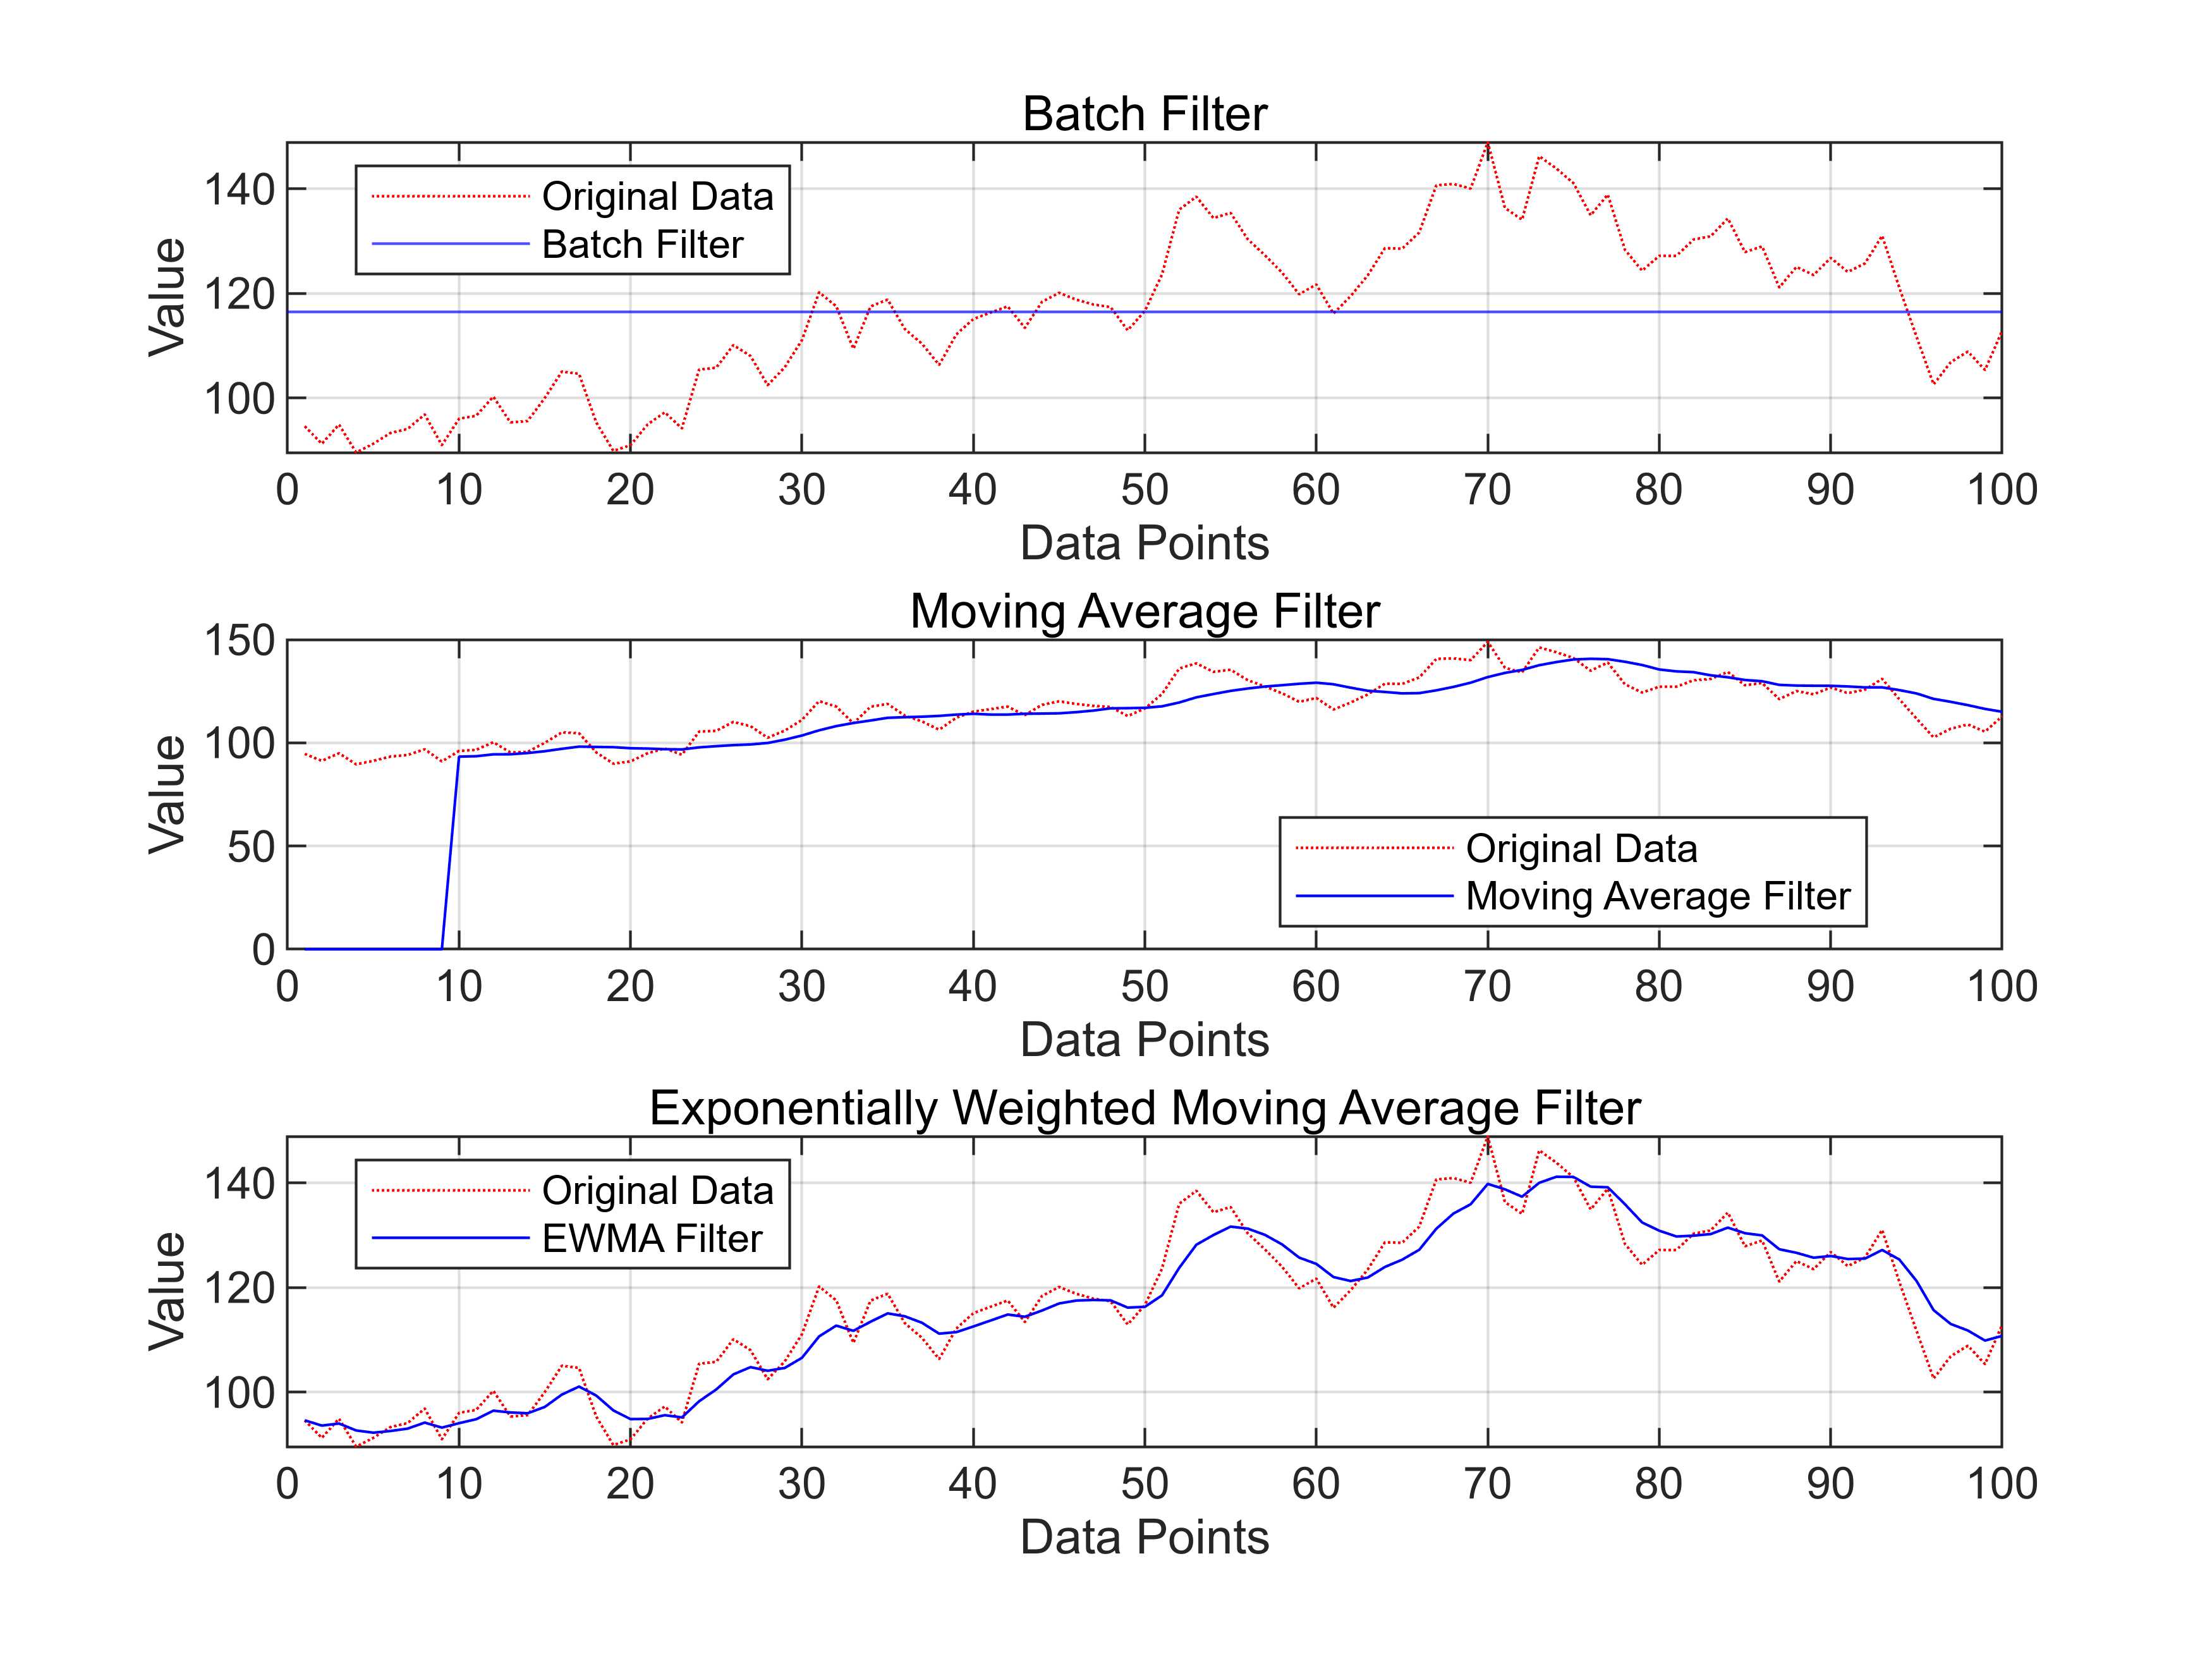

In [1]:
% MATLAB 코드: 평균 필터, 이동평균 필터, 지수 가중 이동평균 필터 구현
clc;
clear;

% 1. 가상의 데이터 생성
n = 100;  % 데이터 개수
x = 100 + cumsum(5 * randn(1, n));  % 무작위로 생성된 데이터

% 2. 평균 필터 (Batch Filter) 함수
function avg = batchFilter(data)
    avg = sum(data) / length(data);
end

% 3. 이동평균 필터 (Moving Average Filter) 함수
function moving_avg = movingAverageFilter(data, window_size)
    moving_avg = zeros(size(data));
    for i = window_size:length(data)
        moving_avg(i) = mean(data(i-window_size+1:i));
    end
end

% 4. 지수 가중 이동평균 필터 (EWMA) 함수
function filtered_data = ewmaFilter(data, alpha)
    filtered_data = zeros(size(data));
    filtered_data(1) = data(1);  % 첫 번째 값 유지
    for i = 2:length(data)
        filtered_data(i) = alpha * data(i) + (1 - alpha) * filtered_data(i-1);
    end
end

% 5. 필터 적용
% (a) 평균 필터 적용 - 전체 데이터를 사용
batch_avg = batchFilter(x);

% (b) 이동평균 필터 적용 - 창 크기 10으로 설정
window_size = 10;
moving_avg = movingAverageFilter(x, window_size);

% (c) 지수 가중 이동평균 필터 적용 - alpha 값을 0.3으로 설정
alpha = 0.3;
ewma_filtered = ewmaFilter(x, alpha);

% 6. 결과 시각화
figure;
subplot(3, 1, 1);
plot(1:n, x, 'r:', 'DisplayName', 'Original Data');
hold on;
yline(batch_avg, 'b-', 'DisplayName', 'Batch Filter');
legend('Location', 'Best');
title('Batch Filter');
xlabel('Data Points');
ylabel('Value');
grid on;

subplot(3, 1, 2);
plot(1:n, x, 'r:', 'DisplayName', 'Original Data');
hold on;
plot(1:n, moving_avg, 'b-', 'DisplayName', 'Moving Average Filter');
legend('Location', 'Best');
title('Moving Average Filter');
xlabel('Data Points');
ylabel('Value');
grid on;

subplot(3, 1, 3);
plot(1:n, x, 'r:', 'DisplayName', 'Original Data');
hold on;
plot(1:n, ewma_filtered, 'b-', 'DisplayName', 'EWMA Filter');
legend('Location', 'Best');
title('Exponentially Weighted Moving Average Filter');
xlabel('Data Points');
ylabel('Value');
grid on;



!!!EndOutputRegion!!!